In [6]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [7]:
df_DA_PL = df[(df["job_country"] == "Poland") & (df['job_title_short'] == 'Data Analyst')]

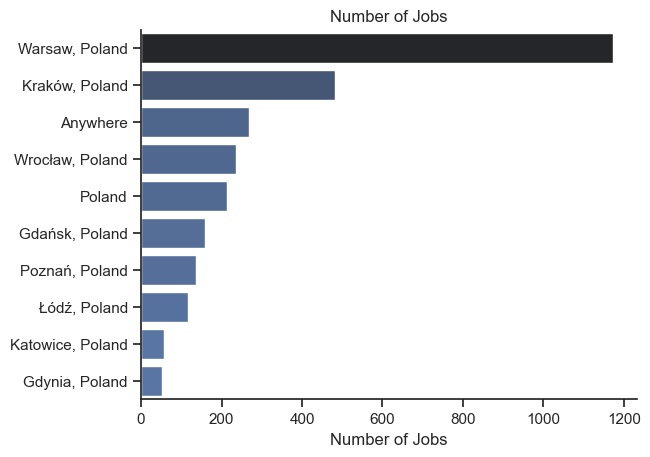

In [8]:
df_plot = df_DA_PL["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x ="count", y="job_location", hue="count", palette='dark:b_r', legend=False)
sns.despine()
plt.title("Number of Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()